In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Leads.csv",skipinitialspace=True)
pd.set_option("display.max_columns",200)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()
# There are certain columns that have missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.shape

(9240, 37)

In [5]:
# checking for duplicates values in our dataset:
df.duplicated().sum()
# in our dataset no two rows are same.

0

In [6]:
df.describe()
# we can see few outliers in some columns. we will treat them later.

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# separating categorical columns from numerical:
categorical_cols = df.select_dtypes(include = ["object"]).columns.tolist()
numerical = df.select_dtypes(include = ["int","float"]).columns.tolist()
print(categorical_cols,"\n\n",numerical)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 

 ['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [8]:
df = df.drop(["Prospect ID","Lead Number"],axis = 1)

###### we can see that there are certain columns that has "Select" in it. we can treat such values as null. Therefore , we shall replace all such values with np.nan

In [9]:
df = df.replace("Select",np.nan)


#### Missing Value Analysis:

In [10]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
# calculating the percentage of missing values in our data:
round((df.isnull().sum()/9240)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
# There are few columns that have very large values of missing values. we shall remove such columns.
drop_cols = []
for i in df.columns:
    if round((df[i].isnull().sum()/9240)*100,2) >=45:
        drop_cols.append(i)
print(drop_cols)
df = df.drop(drop_cols,axis = 1)


['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [13]:
# categorical columns analysis for missing values:

categorical_cols.remove("Prospect ID")
categorical_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

## Exploratory Data Analysis:

###### Lead Origin:

In [14]:
df["Lead Origin"].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

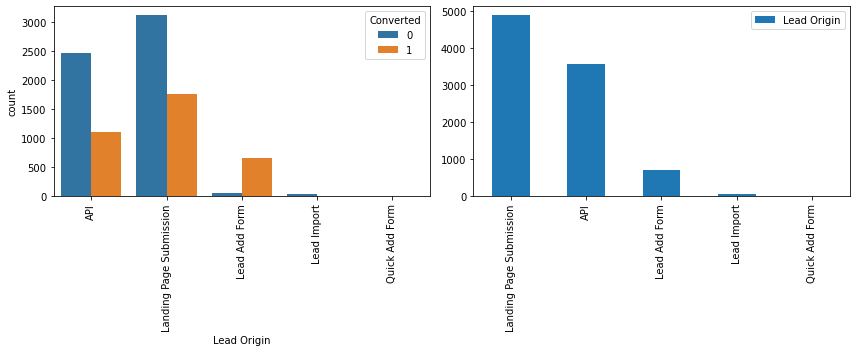

In [15]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x = "Lead Origin",data = df,hue = "Converted",ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
df["Lead Origin"].value_counts().plot.bar(ax = ax2)
sns.move_legend(ax1, "upper right")
plt.tight_layout()
plt.legend()
plt.show()

#Insights: As far as leads generation is considered, Landing page submission brings the most leads
#          Lead Add form has a very high lead conversion rate.

###### Lead Source:

In [16]:
df["Lead Source"].value_counts(normalize = True,dropna=  False)
#replacing the null value with mode.
df["Lead Source"] = df["Lead Source"].replace(np.nan,"Google")


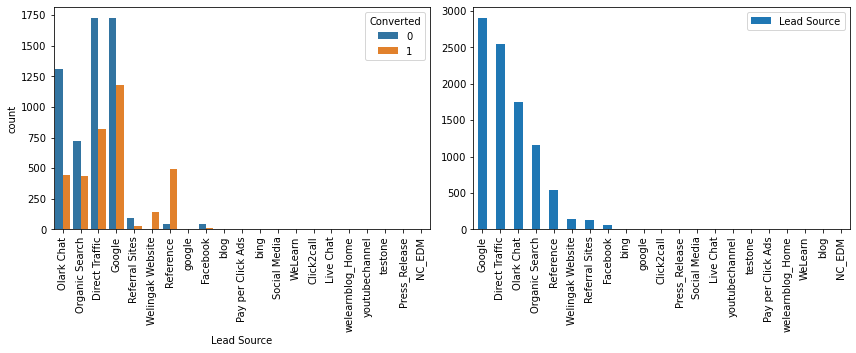

In [17]:

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x = "Lead Source",data = df,hue = "Converted",ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
df["Lead Source"].value_counts().plot.bar(ax = ax2)
sns.move_legend(ax1, "upper right")
plt.tight_layout()
plt.legend()
plt.show()

#Insights: maximum leads are generated from google and leads converted also happens to be the highest from goolge.

###### Country:

In [18]:
df["Country"].value_counts(dropna= False)
# replacing Nan with most repeated value i.e. India
df["Country"] = df["Country"].replace(np.nan,"India")


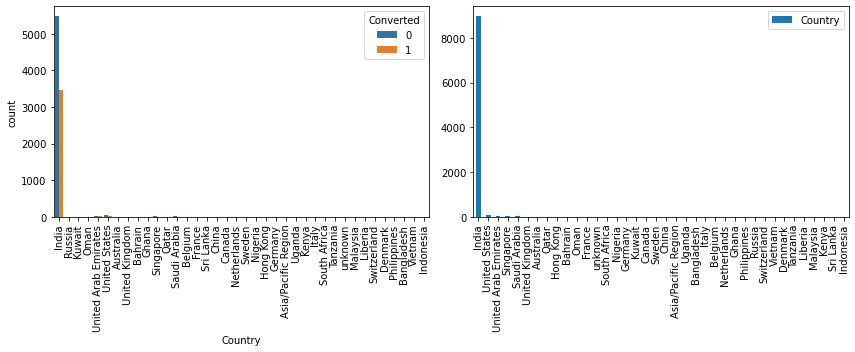

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = "Country",data = df,hue = "Converted",ax =ax1)
df["Country"].value_counts().plot.bar(ax = ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
sns.move_legend(ax1,"upper right")
plt.tight_layout()
plt.legend()
plt.show()

#Insights: Maximum leads and leads getting converted are generated from India.

###### Specialization:

In [20]:
df["Specialization"].value_counts(dropna = False)
# There could be a possibility that these nan values are present because the leads could not find a suitable option on the portal. These are not really
# null values. we will change these values to "Others".

df["Specialization"] = df["Specialization"].replace(np.nan,"Others") 

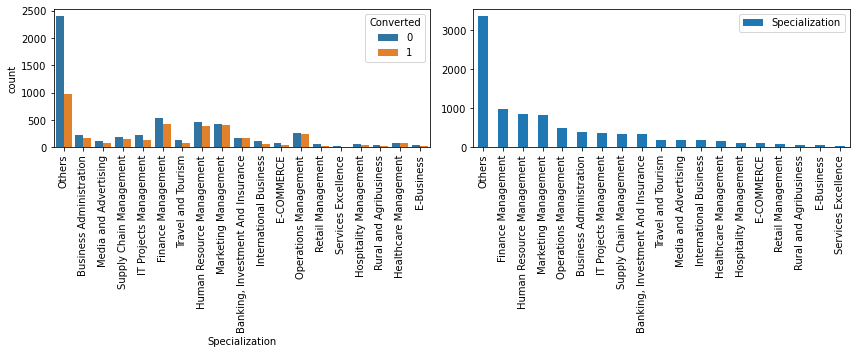

In [21]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = "Specialization",data = df,hue = "Converted",ax =ax1)
df["Specialization"].value_counts().plot.bar(ax = ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
sns.move_legend(ax1,"upper right")
plt.tight_layout()
plt.legend()
plt.show()
#Insights: In general leads that are being generated and getting converted hail from management background.

###### What is your current occupation:

In [22]:
 df["What is your current occupation"].value_counts(dropna = False)
 # replacing nan values with most frequent values:
 df["What is your current occupation"] = df["What is your current occupation"].replace(np.nan,"Unemployed")

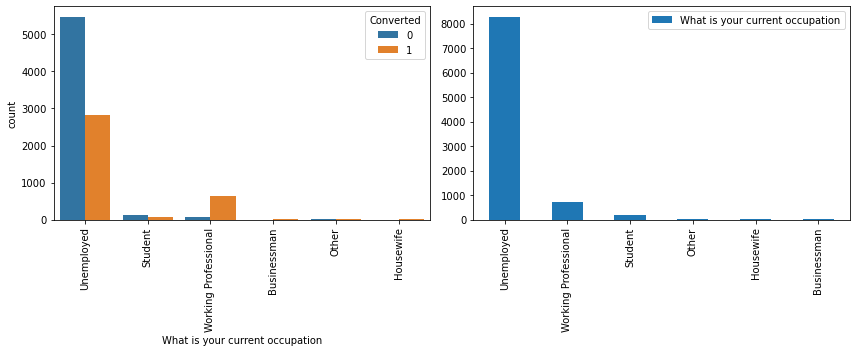

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = "What is your current occupation",data = df,hue = "Converted",ax =ax1)
df["What is your current occupation"].value_counts().plot.bar(ax = ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
sns.move_legend(ax1,"upper right")
plt.tight_layout()
plt.legend()
plt.show()

# Insights: Most leads generated and getting converted happen to be either unemployed or working professional.


###### What matters most to you in choosing a course:

In [24]:
df["What matters most to you in choosing a course"].value_counts(dropna= False)
# replacing nan values with better career prospects:
df["What matters most to you in choosing a course"] = df["What matters most to you in choosing a course"].replace(np.nan,"Better Career Prospects")

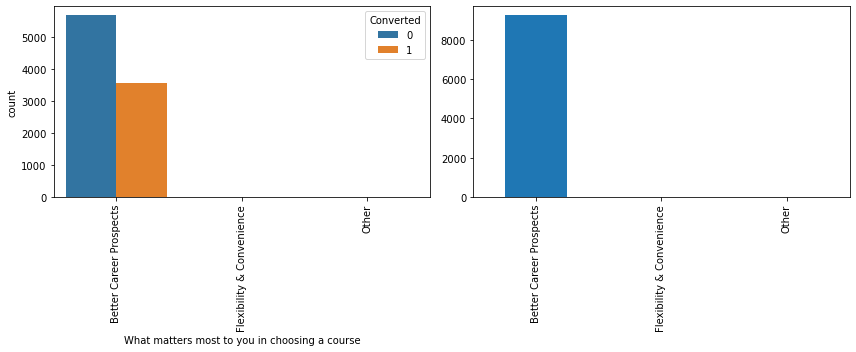

In [25]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = "What matters most to you in choosing a course",data = df,hue = "Converted",ax =ax1)
df["What matters most to you in choosing a course"].value_counts().plot.bar(ax = ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
sns.move_legend(ax1,"upper right")
plt.tight_layout()
plt.show()

#Insights: Most leads that are being generated and converted have "Better Career Prospects" as their reason for enrolling into the courses.

###### Tags:

In [26]:
df["Tags"].value_counts(dropna = False)
# removing nan values with most frequent values.
df["Tags"] = df["Tags"].replace(np.nan,"Will revert after reading the email")

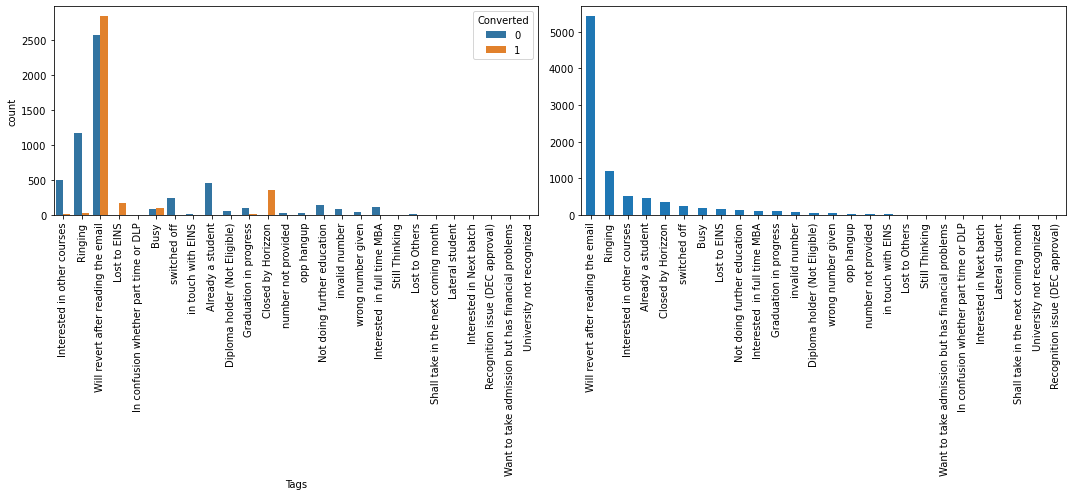

In [27]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
sns.countplot(x = "Tags",data = df,hue = "Converted",ax =ax1)
df["Tags"].value_counts().plot.bar(ax = ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
sns.move_legend(ax1,"upper right")
plt.tight_layout()
plt.show()

#Insights: In general most leads are generated and converted after reading the mail.
#          We can see that 'Lost to EINS' and 'closed by horizzon' have very high conversion rates. 

###### City:

In [28]:
df["City"].value_counts(dropna= False)
# replacing nan values with most frequent values.
df["City"] = df["City"].replace(np.nan,"Mumbai")

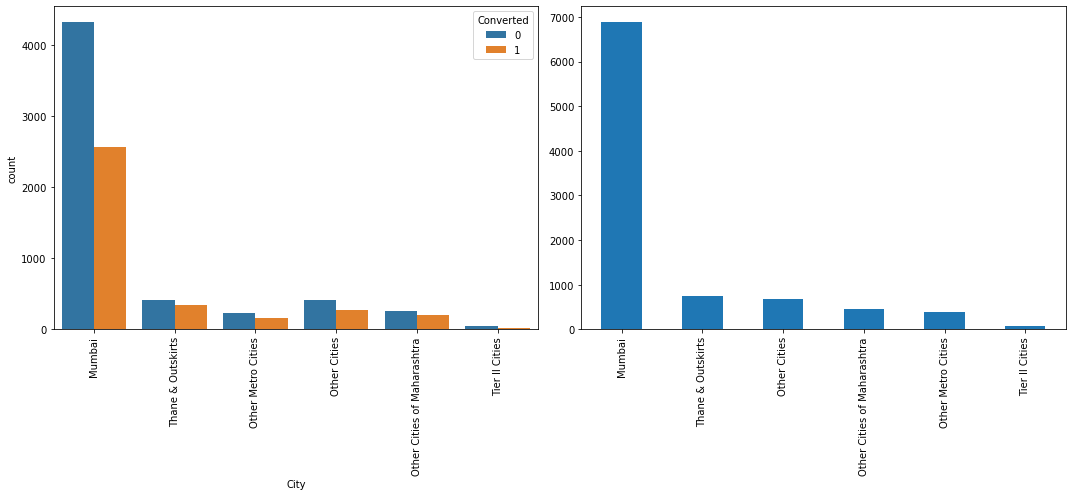

In [29]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
sns.countplot(x = "City",data = df,hue = "Converted",ax =ax1)
df["City"].value_counts().plot.bar(ax = ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
sns.move_legend(ax1,"upper right")
plt.tight_layout()
plt.show()

#Insights: Most leads generated and converted are from mumbai city.

###### Last activity:

In [30]:
df["Last Activity"].value_counts(dropna = False)
#replacing nan with others
df["Last Activity"] = df["Last Activity"].replace(np.nan,"Others")


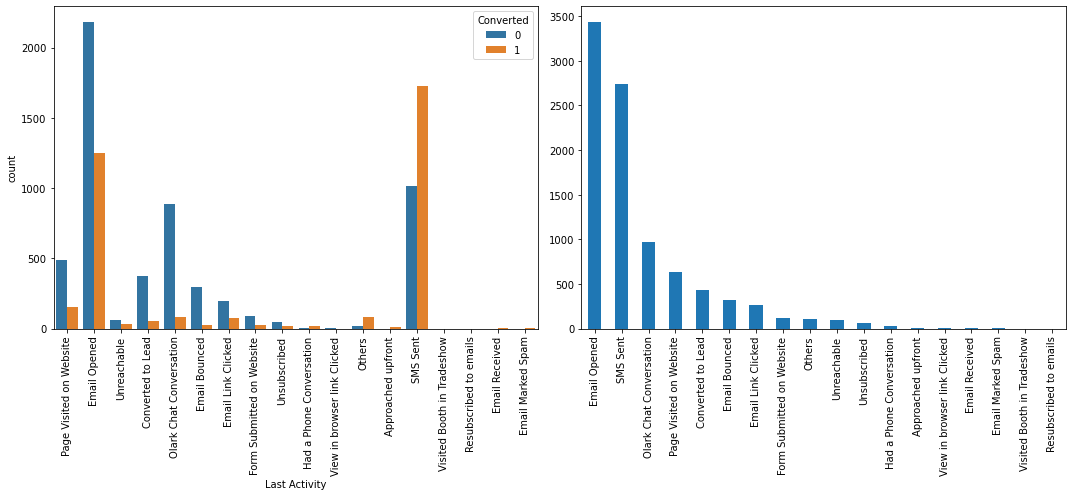

In [31]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
sns.countplot(x = "Last Activity",data = df,hue = "Converted",ax =ax1)
df["Last Activity"].value_counts().plot.bar(ax = ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
sns.move_legend(ax1,"upper right")
plt.tight_layout()
plt.show()

#Insights: Customers with their last activity as "Email opened" or "sms sent" generally form the highest percentage of leads generated and converted.

###### Last Notable Activity:

In [32]:
df["Last Notable Activity"].value_counts(dropna = False)
#replacing nan with others
df["Last Notable Activity"] = df["Last Notable Activity"].replace(np.nan,"Others")


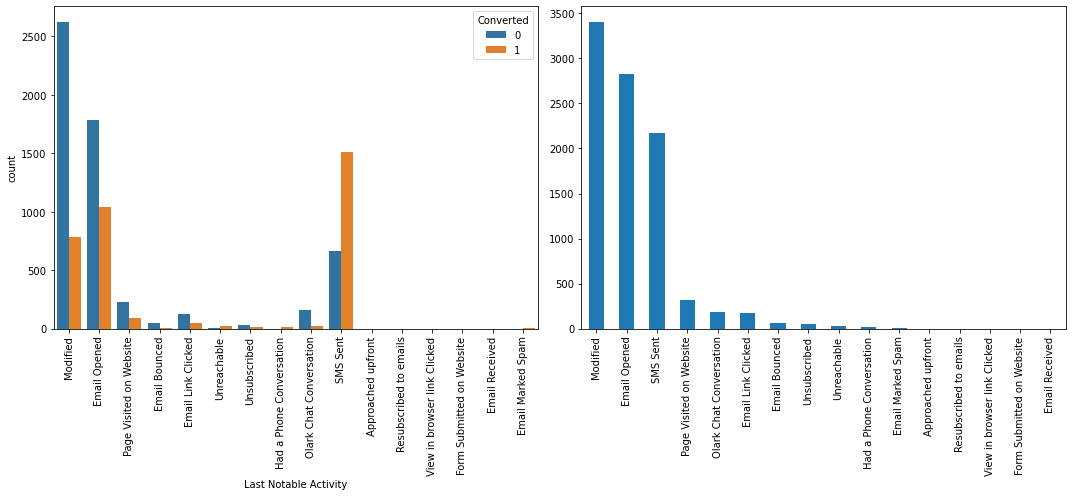

In [33]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
sns.countplot(x = "Last Notable Activity",data = df,hue = "Converted",ax =ax1)
df["Last Notable Activity"].value_counts().plot.bar(ax = ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
sns.move_legend(ax1,"upper right")
plt.tight_layout()
plt.show()


In [34]:
print(round(df.isnull().sum()/len(df.index),2))

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [35]:
for i in df.select_dtypes(include = ["object"]).columns:
    print(df[i].value_counts(normalize = True),"\n\n")

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64 


Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64 


No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64 


No     0.999784
Yes    0.000216
Name: Do Not C

In [36]:
# we have noticed that there are certain columns which can be removed because of the imbalance that they are causing.
drop_columns = ["I agree to pay the amount through cheque","Get updates on DM Content","Update me on Supply Chain Content","Receive More Updates About Our Courses",
    "Through Recommendations","Digital Advertisement","Newspaper","X Education Forums","Newspaper Article","What matters most to you in choosing a course",
    "Search","Country","Do Not Call","Magazine"]   



In [37]:
for i in df.select_dtypes(include = ["object"]).columns:
    print(df[i].value_counts(normalize = True),"\n\n")

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64 


Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64 


No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64 


No     0.999784
Yes    0.000216
Name: Do Not C

In [38]:
df.isnull().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                         

In [39]:
df= df.drop(drop_columns,axis = 1)

In [40]:
df.shape

(9240, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

#### Numerical variables analysis:

In [42]:
num_cols = df.select_dtypes(include=["int",'float']).columns.tolist()

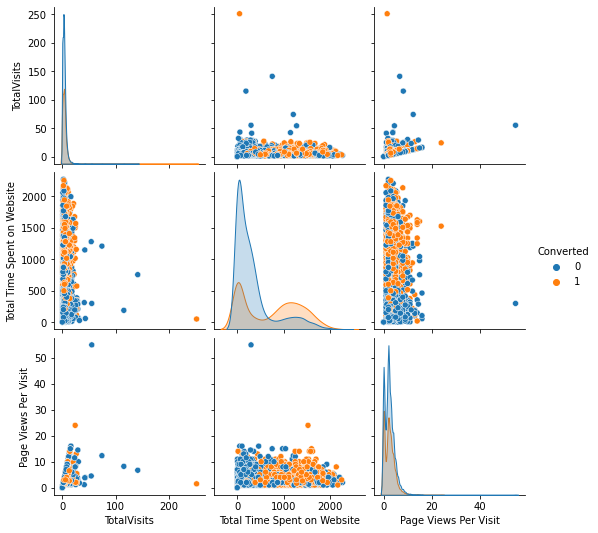

In [43]:
lead = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(lead,diag_kind='kde',hue='Converted')
plt.show()

<AxesSubplot:>

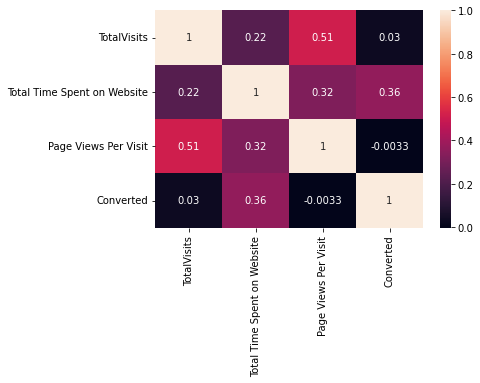

In [44]:
corr = lead.corr()
sns.heatmap(corr,annot = True)

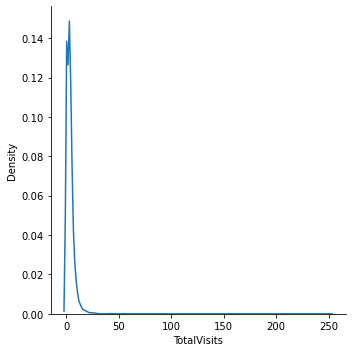

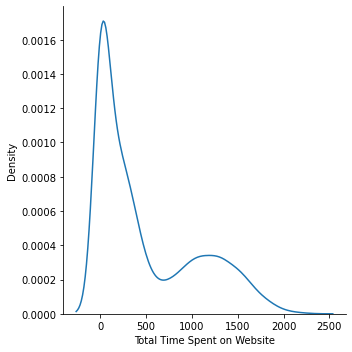

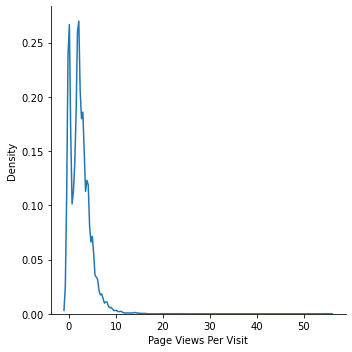

In [45]:

sns.displot(x="TotalVisits",data =df,kind = "kde")
sns.displot(x="Total Time Spent on Website",data = df,kind= 'kde')
sns.displot(x="Page Views Per Visit",data =df,kind= 'kde')
plt.tight_layout()
plt.show()

In [46]:
df[num_cols].describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])
# the columns Total visits and page per per visit definitely has outliers as the max value is so much higher than the 99th percentile.

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000


In [47]:
# inspecting the converted columns i.e. our target variable
print(round(df["Converted"].sum()/9240,2)*100,"%")
#Conversion rate is approximately 39%.

39.0 %


###### TotalVisits:

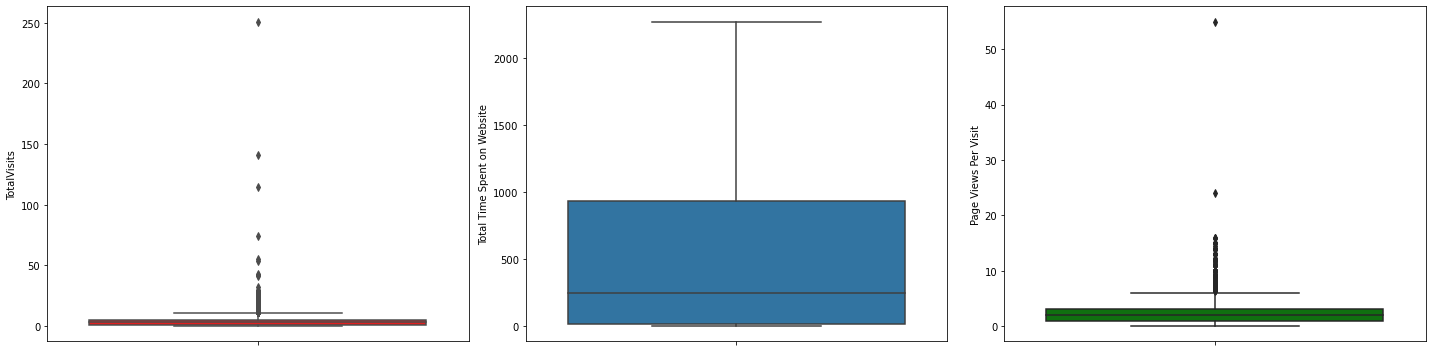

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(y = "TotalVisits",data = df,color = "red")
plt.subplot(1,3,2)
sns.boxplot(y = "Total Time Spent on Website",data = df)
plt.subplot(1,3,3)
sns.boxplot(y = "Page Views Per Visit",data = df,color = "green")
plt.tight_layout()
plt.show()

# Insights: We can clearly see that the two columns TotalVisits and page views per visit has outliers that we will cap between 1 and 99th percentiles.



In [49]:
# treating outliers: taking values between 1 and 99 percentiles

    
Q3 = df["TotalVisits"].quantile(0.99)
Q1 = df["TotalVisits"].quantile(0.01)
df = df[df["TotalVisits"]<=Q3]
df= df[df["TotalVisits"]>=Q1]


In [50]:
df[num_cols].describe(percentiles =[0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9020.000000,9020.000000,9020.000000,9020.000000
mean,0.379712,3.206984,479.759534,2.337271
std,0.485342,2.990108,544.688157,2.062363
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,1.000000
50%,0.000000,3.000000,243.000000,2.000000
75%,1.000000,5.000000,915.250000,3.000000
90%,1.000000,7.000000,1371.000000,5.000000


###### Page Views Per Visit:


In [51]:
Q3 = df["Page Views Per Visit"].quantile(0.99)
Q1 = df["Page Views Per Visit"].quantile(0.01)
df = df[df["Page Views Per Visit"]<=Q3]
df= df[df["Page Views Per Visit"]>=Q1]


In [52]:
df.shape

(8953, 14)

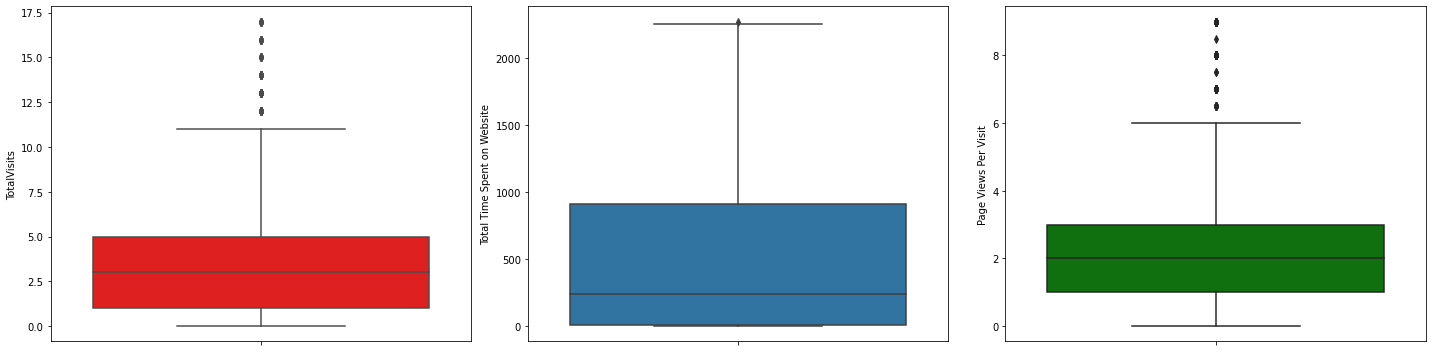

In [53]:
# plotting after removing outliers:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(y = "TotalVisits",data = df,color = "red")
plt.subplot(1,3,2)
sns.boxplot(y = "Total Time Spent on Website",data = df)
plt.subplot(1,3,3)
sns.boxplot(y = "Page Views Per Visit",data = df,color = "green")
plt.tight_layout()
plt.show()

# after treating outliers there is no steep increase on the y axis anymore.

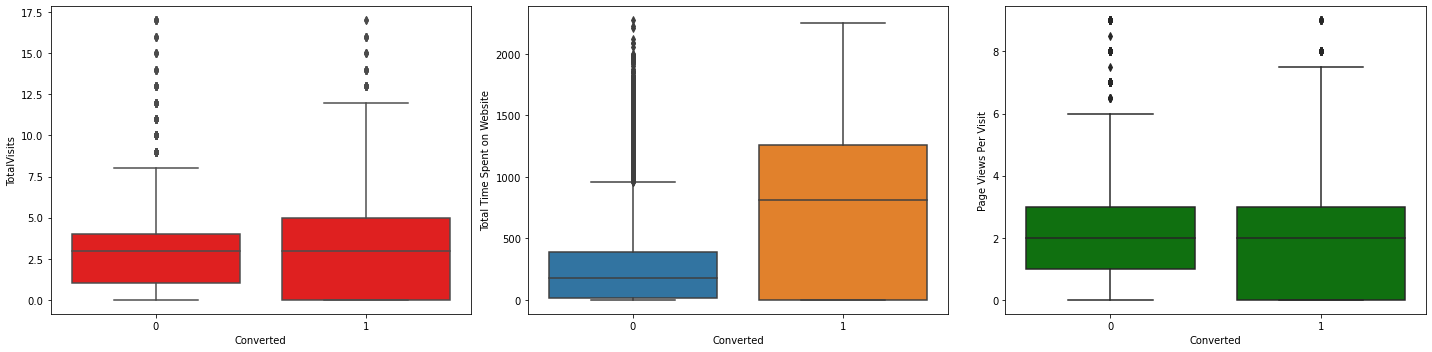

In [54]:
# Plotting based on converted columns:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(y = "TotalVisits",data = df,color = "red",x = "Converted")
plt.subplot(1,3,2)
sns.boxplot(y = "Total Time Spent on Website",data = df,x= "Converted")
plt.subplot(1,3,3)
sns.boxplot(y = "Page Views Per Visit",data = df,color = "green",x= "Converted")
plt.tight_layout()
plt.show()

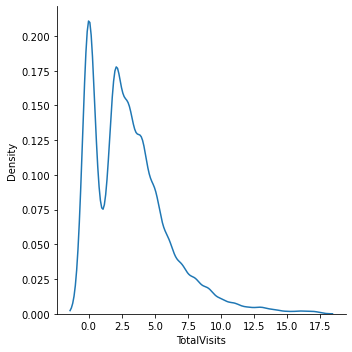

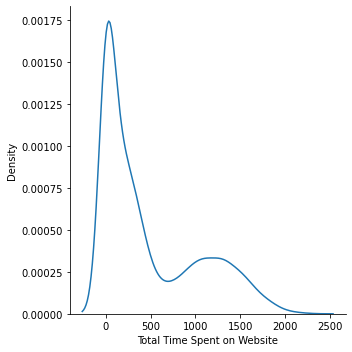

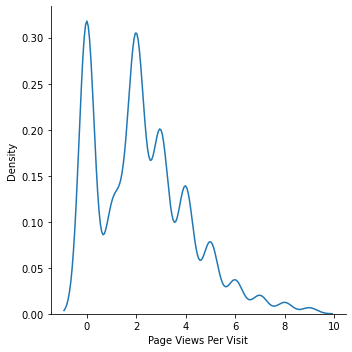

In [55]:

sns.displot(x="TotalVisits",data =df,kind = "kde")
sns.displot(x="Total Time Spent on Website",data = df,kind= 'kde')
sns.displot(x="Page Views Per Visit",data =df,kind= 'kde')
plt.tight_layout()
plt.show()

## Data preparation and modelling:

In [56]:
categorical_cols = df.select_dtypes(include = ["object"]).columns.tolist()
categorical_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [57]:
df[categorical_cols]
# there are two binary columns in the dataframe.
def binary_map(x):
    return x.map({"Yes":1,"No":0})
df[["Do Not Email","A free copy of Mastering The Interview"]] =df[["Do Not Email","A free copy of Mastering The Interview"]].apply(binary_map)
df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Will revert after reading the email,Mumbai,0,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,wrong number given,Mumbai,1,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,invalid number,Mumbai,1,SMS Sent
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,Unemployed,Will revert after reading the email,Other Metro Cities,0,SMS Sent


In [58]:
 origin = pd.get_dummies(df["Lead Origin"],drop_first = True,prefix = "Origin")


In [59]:
df["Lead Source"].value_counts()
# there are two entries with same name google. We will change this. Also we can club some entries as others(especially ones with less frequency)
df["Lead Source"] = df["Lead Source"].replace("google","Google")
df["Lead Source"] = df["Lead Source"].replace(["bing","Click2call","Social Media","Live Chat","youtubechannel","Press_Release","testone",
"Pay per Click Ads","welearnblog_Home","WeLearn","blog","NC_EDM"],"Others")

In [60]:
df["Lead Source"].value_counts()
source = pd.get_dummies(df["Lead Source"],prefix = "Source")
source = source.drop("Source_Others",axis = 1)

###### Last activity:

In [61]:
df["Last Activity"].value_counts()
# we can club some entries as others.
df["Last Activity"] = df["Last Activity"].replace(["Had a Phone Conversation","Approached upfront","View in browser link Clicked","Email Received",
"Email Marked Spam","Visited Booth in Tradeshow","Resubscribed to emails"],"Others")

In [62]:
df["Last Activity"].value_counts()
last_activity = pd.get_dummies(df["Last Activity"],prefix = "lastactivity")
last_activity = last_activity.drop("lastactivity_Others",axis = 1)

###### Specialization:

In [63]:
df["Specialization"].value_counts()
# we can club all management specialisation into one specialisation.
df["Specialization"] = df["Specialization"].replace(["Finance Management","Human Resource Management","Marketing Management","Operations Management",
"IT Projects Management","Supply Chain Management","Healthcare Management","Hospitality Management","Retail Management"],"Management")
df["Specialization"] = df["Specialization"].replace(["E-COMMERCE","E-Business"],"E-Commerce")

In [64]:
specialization = pd.get_dummies(df["Specialization"],prefix = "Specialization")
specialization = specialization.drop("Specialization_Others",axis = 1)

In [65]:
df["Specialization"].value_counts()

Management                           4126
Others                               3284
Business Administration               390
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
E-Commerce                            163
Rural and Agribusiness                 70
Services Excellence                    38
Name: Specialization, dtype: int64

###### What is your current occupation:

In [66]:
df["What is your current occupation"].value_counts()

Unemployed              8053
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [67]:
occupation = pd.get_dummies(df["What is your current occupation"],drop_first = True,prefix = "Occupation")


###### Tags:

In [68]:
df["Tags"].value_counts()

Will revert after reading the email                  5286
Ringing                                              1162
Interested in other courses                           505
Already a student                                     461
Closed by Horizzon                                    290
switched off                                          237
Busy                                                  183
Lost to EINS                                          169
Not doing further education                           137
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         81
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [69]:
df["Tags"] = df["Tags"].replace(["Not doing further education","Interested in full time MBA","Graduation in progress","invalid number",
"Diploma holder (Not Eligible)","wrong number given","opp hangup","number not provided","in touch with EINS","Lost to others","Still Thinking",
"In confusion whether part time or DLP","Interested in Next batch","Want to take admission but has financial problems","Lateral student",
"Shall take in the next coming month","University not recognized","Recognition issue (DEC approval)","Lost to Others"],"Others")

In [70]:
df["Tags"].value_counts()

Will revert after reading the email    5286
Ringing                                1162
Others                                  544
Interested in other courses             505
Already a student                       461
Closed by Horizzon                      290
switched off                            237
Busy                                    183
Lost to EINS                            169
Interested  in full time MBA            116
Name: Tags, dtype: int64

In [71]:
tags = pd.get_dummies(df["Tags"],prefix = "Tags",drop_first= True)




###### city:

In [72]:
df["City"].value_counts()

Mumbai                         6687
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

In [73]:
city= pd.get_dummies(df["City"],drop_first=True)

###### Last notable activity:

In [74]:
df["Last Notable Activity"].value_counts()

Modified                        3224
Email Opened                    2789
SMS Sent                        2143
Page Visited on Website          288
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      46
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [75]:
df["Last Notable Activity"] = df["Last Notable Activity"].replace(["Unsubscribed","Unreachable","Had a Phone Conversation","Email Marked Spam",
"Approached upfront","Resubscribed to emails","View in browser link Clicked","Form Submitted on Website","Email Received"],"Others")

In [76]:
last_notable_activity=pd.get_dummies(df["Last Notable Activity"],prefix="Last_Notable_Activity")
last_notable_activity=last_notable_activity.drop("Last_Notable_Activity_Others",axis=1)

In [77]:
df = pd.concat([df,origin,source,last_activity,specialization,occupation,tags,city,last_notable_activity],axis=1)

In [78]:
#dropping the columns for which we created dummy variables:
df = df.drop(["Last Notable Activity","City","Specialization","Tags","Lead Origin","Lead Source","What is your current occupation",
"Last Activity"],axis = 1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 62 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      8953 non-null   int64  
 1   Converted                                         8953 non-null   int64  
 2   TotalVisits                                       8953 non-null   float64
 3   Total Time Spent on Website                       8953 non-null   int64  
 4   Page Views Per Visit                              8953 non-null   float64
 5   A free copy of Mastering The Interview            8953 non-null   int64  
 6   Origin_Landing Page Submission                    8953 non-null   uint8  
 7   Origin_Lead Add Form                              8953 non-null   uint8  
 8   Origin_Lead Import                                8953 non-null   uint8  
 9   Source_Direct Traff

##### Splitting the dataset:

In [80]:
from sklearn.model_selection import train_test_split
y = df.pop("Converted")
X= df

In [81]:
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=100)

In [82]:
# scaling the variables:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [83]:
num_cols = X_train.select_dtypes(include =["int64","float64"]).columns

In [84]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [85]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Direct Traffic,Source_Facebook,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Source_Referral Sites,Source_Welingak Website,lastactivity_Converted to Lead,lastactivity_Email Bounced,lastactivity_Email Link Clicked,lastactivity_Email Opened,lastactivity_Form Submitted on Website,lastactivity_Olark Chat Conversation,lastactivity_Page Visited on Website,lastactivity_SMS Sent,lastactivity_Unreachable,lastactivity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Commerce,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
count,6.267000e+03,6.267000e+03,6.267000e+03,6.267000e+03,6.267000e+03,6267.000000,6267.000000,6267.00000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,-9.143795e-16,1.989083e-16,-1.465062e-16,1.346369e-17,-1.608911e-16,0.528961,0.069411,0.00351,0.277326,0.003670,0.319770,0.198979,0.119355,0.049465,0.013563,0.015637,0.047551,0.032871,0.029679,0.380724,0.013563,0.109781,0.062390,0.302537,0.009414,0.006861,0.035743,0.041328,0.019946,0.019786,0.457795,0.022499,0.007819,0.004468,0.019786,0.000798,0.001436,0.021063,0.905697,0.070369,0.020903,0.031913,0.012765,0.055050,0.017393,0.058082,0.127334,0.595341,0.027286,0.076592,0.046753,0.040849,0.086166,0.008457,0.006542,0.018510,0.311792,0.359821,0.019946,0.030796,0.241583
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,0.499200,0.254172,0.05915,0.447714,0.060474,0.466425,0.399264,0.324232,0.216855,0.115678,0.124078,0.212831,0.178312,0.169714,0.485604,0.115678,0.312642,0.241882,0.459393,0.096578,0.082555,0.185663,0.199063,0.139825,0.139276,0.498255,0.148311,0.088084,0.066698,0.139276,0.028237,0.037872,0.143605,0.292274,0.255788,0.143072,0.175783,0.112269,0.228097,0.130740,0.233917,0.333373,0.490865,0.162928,0.265964,0.211126,0.197956,0.280631,0.091580,0.080625,0.134796,0.463262,0.479986,0.139825,0.172779,0.428077
min,-2.857204e-01,-1.080035e+00,-8.721766e-01,-1.183825e+00,-6.673390e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

###### Model Building:

In [86]:
#For feature selection we will use RFE:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [87]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
sup_cols = X_train.columns[rfe.support_]
sup_cols

Index(['Total Time Spent on Website', 'Origin_Lead Add Form',
       'Source_Welingak Website', 'lastactivity_Email Bounced',
       'lastactivity_Olark Chat Conversation', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last_Notable_Activity_Email Bounced',
       'Last_Notable_Activity_SMS Sent'],
      dtype='object')

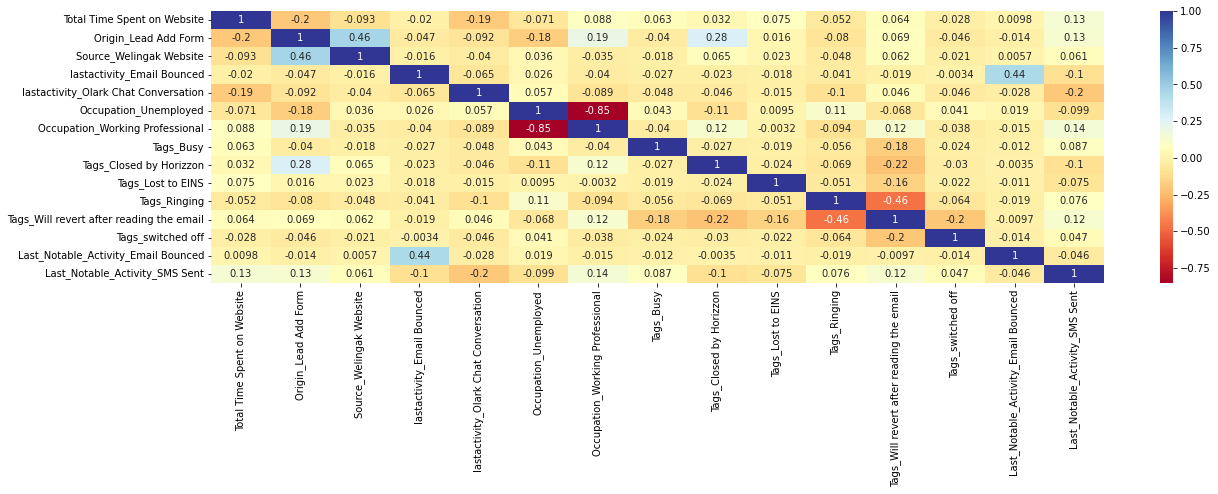

In [88]:
corr1=X_train[sup_cols].corr()
plt.figure(figsize = (20,5))
sns.heatmap(corr1,annot = True,cmap = "RdYlBu")
plt.show()

###### Model 1:

In [89]:
X_train_sm =sm.add_constant(X_train[sup_cols])
model1=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
model1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1761.8
Date:                Wed, 12 Jan 2022   Deviance:                       3523.5
Time:                        23:32:40   Pearson chi2:                 1.24e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7888      0.348     -8.022      0.000      -3.470      -2.107
Total Time Spent on Website                  0.9739      0.045     21.716      0.000       0.886       1.062
Origin_Lead Add Form                         3.4488      0.302     11.413      0.000       2.857       4.041
Source_Welingak Website                      1.6944      1.055      1.607      0.108      -0.373       3.761
lastactivity_Email Bounced                  -3.1567      0.602     -5.244      0.000      -4.337      -1.977
lastactivity_Olark Chat Conversation        -1.4621      0.188     -7.777      0.000      -1.831      -1.094
Occupation_Unemployed                       -1.5114      0.334     -4.527      0.000      -2.166      -0.857
Occupation_Working Professional              1.2731      0.415      3.071      0.002       0.461       2.086
Tags_Busy                                    3.0431      0.297     10.262      0.000       2.462       3.624
Tags_Closed by Horizzon                      8.7157      1.035      8.422      0.000       6.687      10.744
Tags_Lost to EINS                            7.9598      0.647     12.301      0.000       6.692       9.228
Tags_Ringing                                -1.1976      0.307     -3.902      0.000      -1.799      -0.596
Tags_Will revert after reading the email     3.6260      0.204     17.757      0.000       3.226       4.026
Tags_switched off                           -1.4826      0.633     -2.343      0.019      -2.723      -0.243
Last_Notable_Activity_Email Bounced          2.8503      0.780      3.656      0.000       1.322       4.378
Last_Notable_Activity_SMS Sent               2.4431      0.115     21.264      0.000       2.218       2.668
============================================================================================================
"""

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# Finding the VIF values:
VIF = pd.DataFrame()
VIF["Features"] = X_train[sup_cols].columns
VIF["VIF"] = [variance_inflation_factor(X_train[sup_cols].values,i) for i in range(X_train[sup_cols].shape[1])]
VIF =VIF.sort_values(by = "VIF",ascending=False)
VIF

,Features,VIF
5,Occupation_Unemployed,5.573863
11,Tags_Will revert after reading the email,4.546775
10,Tags_Ringing,1.798919
1,Origin_Lead Add Form,1.702183
14,Last_Notable_Activity_SMS Sent,1.561174
6,Occupation_Working Professional,1.547723
8,Tags_Closed by Horizzon,1.337125
2,Source_Welingak Website,1.325607
3,lastactivity_Email Bounced,1.307197
13,Last_Notable_Activity_Email Bounced,1.249998


#### Model 2:

In [92]:
# removing Source_Welingak Website due to high p value:
sup_cols =sup_cols.drop("Source_Welingak Website")

In [93]:
X_train_sm = sm.add_constant(X_train[sup_cols])
model2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1763.8
Date:                Wed, 12 Jan 2022   Deviance:                       3527.6
Time:                        23:32:40   Pearson chi2:                 1.26e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8013      0.349     -8.027      0.000      -3.485      -2.117
Total Time Spent on Website                  0.9751      0.045     21.723      0.000       0.887       1.063
Origin_Lead Add Form                         3.7187      0.280     13.270      0.000       3.169       4.268
lastactivity_Email Bounced                  -3.1586      0.602     -5.248      0.000      -4.338      -1.979
lastactivity_Olark Chat Conversation        -1.4635      0.188     -7.784      0.000      -1.832      -1.095
Occupation_Unemployed                       -1.5084      0.335     -4.499      0.000      -2.165      -0.851
Occupation_Working Professional              1.2681      0.416      3.047      0.002       0.453       2.084
Tags_Busy                                    3.0530      0.297     10.280      0.000       2.471       3.635
Tags_Closed by Horizzon                      8.7231      1.035      8.427      0.000       6.694      10.752
Tags_Lost to EINS                            7.9711      0.647     12.315      0.000       6.702       9.240
Tags_Ringing                                -1.2236      0.309     -3.960      0.000      -1.829      -0.618
Tags_Will revert after reading the email     3.6377      0.205     17.756      0.000       3.236       4.039
Tags_switched off                           -1.4720      0.633     -2.326      0.020      -2.713      -0.232
Last_Notable_Activity_Email Bounced          2.8739      0.775      3.706      0.000       1.354       4.394
Last_Notable_Activity_SMS Sent               2.4413      0.115     21.246      0.000       2.216       2.666
============================================================================================================
"""

In [94]:
VIF = pd.DataFrame()
VIF["Features"] = X_train[sup_cols].columns
VIF["VIF"] = [variance_inflation_factor(X_train[sup_cols].values,i) for i in range(X_train[sup_cols].shape[1])]
VIF =VIF.sort_values(by = "VIF",ascending=False)
VIF

,Features,VIF
4,Occupation_Unemployed,5.573037
10,Tags_Will revert after reading the email,4.545827
9,Tags_Ringing,1.798406
13,Last_Notable_Activity_SMS Sent,1.561139
5,Occupation_Working Professional,1.526299
1,Origin_Lead Add Form,1.353015
7,Tags_Closed by Horizzon,1.332729
2,lastactivity_Email Bounced,1.307156
12,Last_Notable_Activity_Email Bounced,1.249790
3,lastactivity_Olark Chat Conversation,1.242109


#### Model 3:

In [95]:
# occupation_unemployed has a high vif value. so we will drop it:
sup_cols = sup_cols.drop("Occupation_Unemployed")

In [96]:
X_train_sm =sm.add_constant(X_train[sup_cols])
model3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1774.0
Date:                Wed, 12 Jan 2022   Deviance:                       3547.9
Time:                        23:32:41   Pearson chi2:                 1.21e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1711      0.201    -20.755      0.000      -4.565      -3.777
Total Time Spent on Website                  0.9766      0.045     21.789      0.000       0.889       1.064
Origin_Lead Add Form                         3.7364      0.279     13.414      0.000       3.190       4.282
lastactivity_Email Bounced                  -3.1104      0.605     -5.139      0.000      -4.297      -1.924
lastactivity_Olark Chat Conversation        -1.4670      0.187     -7.838      0.000      -1.834      -1.100
Occupation_Working Professional              2.7290      0.262     10.401      0.000       2.215       3.243
Tags_Busy                                    2.9312      0.293      9.988      0.000       2.356       3.506
Tags_Closed by Horizzon                      8.5927      1.034      8.309      0.000       6.566      10.619
Tags_Lost to EINS                            7.8474      0.645     12.165      0.000       6.583       9.112
Tags_Ringing                                -1.3488      0.306     -4.402      0.000      -1.949      -0.748
Tags_Will revert after reading the email     3.5242      0.201     17.522      0.000       3.130       3.918
Tags_switched off                           -1.5680      0.633     -2.479      0.013      -2.808      -0.328
Last_Notable_Activity_Email Bounced          2.7898      0.777      3.590      0.000       1.267       4.313
Last_Notable_Activity_SMS Sent               2.4233      0.114     21.202      0.000       2.199       2.647
============================================================================================================
"""

In [97]:
VIF = pd.DataFrame()
VIF["Features"] = X_train[sup_cols].columns
VIF["VIF"] = [variance_inflation_factor(X_train[sup_cols].values,i) for i in range(X_train[sup_cols].shape[1])]
VIF =VIF.sort_values(by = "VIF",ascending=False)
VIF

,Features,VIF
9,Tags_Will revert after reading the email,1.577546
12,Last_Notable_Activity_SMS Sent,1.543685
1,Origin_Lead Add Form,1.352750
2,lastactivity_Email Bounced,1.280263
11,Last_Notable_Activity_Email Bounced,1.249508
3,lastactivity_Olark Chat Conversation,1.181796
4,Occupation_Working Professional,1.171215
0,Total Time Spent on Website,1.163502
6,Tags_Closed by Horizzon,1.154100
8,Tags_Ringing,1.095452


In [98]:
# predicting on the y_train:
y_train_pred = model3.predict(X_train_sm)

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)

In [100]:
y_train_pred_final = pd.DataFrame({"Converted":y_train.values,"Converted_prob":y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final

,Converted,Converted_prob,Prospect ID
0,1,0.215578,9196
1,0,0.041748,4696
2,0,0.759391,3274
3,0,0.003051,2164
4,1,0.641551,1667
...,...,...,...
6262,1,0.246550,379
6263,1,0.628743,84
6264,0,0.016749,8313
6265,0,0.182626,7169


In [101]:
y_train_pred_final["Predicted"] = y_train_pred_final.Converted_prob.apply(lambda x:1 if x>0.5 else 0)
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.215578,9196,0
1,0,0.041748,4696,0
2,0,0.759391,3274,1
3,0,0.003051,2164,0
4,1,0.641551,1667,1
...,...,...,...,...
6262,1,0.246550,379,0
6263,1,0.628743,84,1
6264,0,0.016749,8313,0
6265,0,0.182626,7169,0


In [102]:
# creating a confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
cm

array([[3596,  286],
       [ 392, 1993]], dtype=int64)

In [103]:
# Defining TP, TN, FP ,FN
TN =cm[0,0]
FP = cm[0,1]
FN =cm[1,0]
TP =cm[1,1]

In [104]:
from sklearn import metrics

In [105]:
accuracy = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted),2)
precision = round(metrics.precision_score(y_train_pred_final.Converted,y_train_pred_final.Predicted),2)
recall = round(metrics.recall_score(y_train_pred_final.Converted,y_train_pred_final.Predicted),2)
sensitivity = round(TP/(TP+FN),2)
specificity = round(TN/(TN+FP),2)
false_positive_rate = round(FP/(TN+FP),2)

positive_pred_value = round(TP/(TP+FP),2)
negative_pred_value = round(TN/(TN+FN),2)
print("accuracy score:- ",accuracy,"\n","precision:- ",precision,"\n","recall:- ",recall,"\n","sensitivity:- ",sensitivity,"\n","specificity:- ",specificity,
"\n","Positive_prediction_power:- ",positive_pred_value,"\n","negative_prediction_power:-",negative_pred_value,"\n","False_positive_rate:- ",false_positive_rate)

accuracy score:-  0.89 
 precision:-  0.87 
 recall:-  0.84 
 sensitivity:-  0.84 
 specificity:-  0.93 
 Positive_prediction_power:-  0.87 
 negative_prediction_power:- 0.9 
 False_positive_rate:-  0.07


In [106]:
# plotting ROC curve:
def draw_roc(actual,prob):
    fpr,tpr,threshold = metrics.roc_curve(actual,prob,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual,prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()

    return None

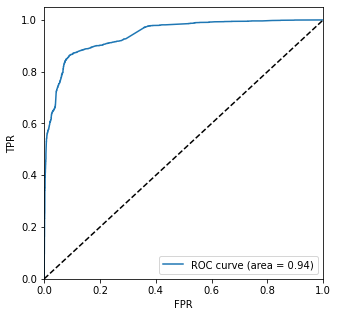

In [107]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

In [108]:
# Looking for an optimal threshold value:
num =[float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x:1 if x>i else 0 )
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.215578,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.041748,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.759391,3274,1,1,1,1,1,1,1,1,1,0,0
3,0,0.003051,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.641551,1667,1,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,1,0.246550,379,0,1,1,1,0,0,0,0,0,0,0
6263,1,0.628743,84,1,1,1,1,1,1,1,1,0,0,0
6264,0,0.016749,8313,0,1,0,0,0,0,0,0,0,0,0
6265,0,0.182626,7169,0,1,1,0,0,0,0,0,0,0,0


In [109]:
#calculating metrices for different threshold values:
cutoff_df = pd.DataFrame(columns = ["prob","accuracy","sensitivity","specificity","precision","recall"])
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total = sum(sum(cm1))
    TN = cm1[0,0]
    FP = cm1[0,1]
    FN = cm1[1,0]
    TP = cm1[1,1]
    accuracy = metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final[i])
    precision = metrics.precision_score(y_train_pred_final.Converted,y_train_pred_final[i])
    recall = metrics.recall_score(y_train_pred_final.Converted,y_train_pred_final[i])
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity,precision,recall]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity  precision    recall
0.0   0.0  0.380565     1.000000     0.000000   0.380565  1.000000
0.1   0.1  0.751396     0.977778     0.612313   0.607766  0.977778
0.2   0.2  0.806766     0.917820     0.738537   0.683208  0.917820
0.3   0.3  0.876336     0.879665     0.874292   0.811292  0.879665
0.4   0.4  0.891655     0.859958     0.911128   0.856010  0.859958
0.5   0.5  0.891814     0.835639     0.926327   0.874506  0.835639
0.6   0.6  0.880485     0.789099     0.936631   0.884398  0.789099
0.7   0.7  0.868677     0.727883     0.955178   0.908901  0.727883
0.8   0.8  0.833413     0.593291     0.980938   0.950302  0.593291
0.9   0.9  0.814425     0.524528     0.992530   0.977344  0.524528


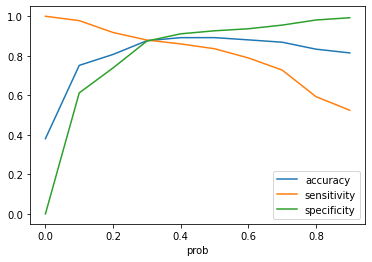

In [110]:
cutoff_df.plot.line(x= "prob",y = ["accuracy","sensitivity","specificity"])
plt.show()

In [111]:
# 0.3 seems like the most optimal cutoff point.
y_train_pred_final["Predicted_1"]=y_train_pred_final.Converted_prob.map(lambda x : 1 if x>0.3 else 0)
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_1
0,1,0.215578,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.041748,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.759391,3274,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.003051,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.641551,1667,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,1,0.246550,379,0,1,1,1,0,0,0,0,0,0,0,0
6263,1,0.628743,84,1,1,1,1,1,1,1,1,0,0,0,1
6264,0,0.016749,8313,0,1,0,0,0,0,0,0,0,0,0,0
6265,0,0.182626,7169,0,1,1,0,0,0,0,0,0,0,0,0


In [112]:
#### checking all the metrices on 0.3 as the threshold:
cm2 = confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted_1)
TN = cm2[0,0]
FP = cm2[0,1]
FN = cm2[1,0]
TP = cm2[1,1]
accuracy = metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted_1)
precision = metrics.precision_score(y_train_pred_final.Converted,y_train_pred_final.Predicted_1)
recall = metrics.recall_score(y_train_pred_final.Converted,y_train_pred_final.Predicted_1)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
false_positive_rate = FP/(TN+FP)

positive_pred_value = TP/(TP+FP)
negative_pred_value = TN/(TN+FN)
print("accuracy score:- ",accuracy,"\n","precision:- ",precision,"\n","recall:- ",recall,"\n","sensitivity:- ",sensitivity,"\n","specificity:- ",specificity,
"\n","Positive_prediction_power:- ",positive_pred_value,"\n","negative_prediction_power:-",negative_pred_value,"\n","False_positive_rate:- ",false_positive_rate)

accuracy score:-  0.8763363650869634 
 precision:-  0.811291569992266 
 recall:-  0.879664570230608 
 sensitivity:-  0.879664570230608 
 specificity:-  0.8742916022668727 
 Positive_prediction_power:-  0.811291569992266 
 negative_prediction_power:- 0.9220320565063841 
 False_positive_rate:-  0.12570839773312725


In [113]:
#Our model will predict outcome as 1 when it is 1 87% of the times out of which it will be correct 81% of the times
#our model will predict that the customer has converted 12.5% of the times when the lead has not been converted. 

In [114]:
from sklearn.metrics import precision_recall_curve
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

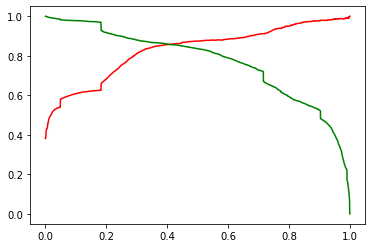

In [115]:
plt.plot(thresholds,p[:-1],"r")
plt.plot(thresholds,r[:-1],"g")

In [116]:
# making predictions on the test set now:
num_cols = X_test.select_dtypes(include = ["int","float"]).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.shape


(2686, 61)

In [117]:
X_test = X_test[sup_cols]

In [118]:
X_test.head()

,Total Time Spent on Website,Origin_Lead Add Form,lastactivity_Email Bounced,lastactivity_Olark Chat Conversation,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_SMS Sent
7681,-0.311318,0,0,0,0,0,0,0,1,0,0,0,1
984,-0.550262,0,0,0,0,0,0,0,0,0,0,0,0
8135,0.812462,0,0,0,0,0,0,0,0,1,0,0,1
6915,-0.628665,0,0,0,0,0,0,0,1,0,0,0,0
2712,-0.421456,0,0,0,0,0,0,0,0,1,0,0,0


In [119]:
X_test_sm = sm.add_constant(X_test)

In [120]:
y_test_pred = model3.predict(X_test_sm)

In [121]:
y_test_pred[:10]

7681    0.032278
984     0.008938
8135    0.928901
6915    0.002164
2712    0.257600
244     0.004928
4698    0.007001
8287    0.048113
6791    0.499727
8970    0.011486
dtype: float64

In [122]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [123]:
y_pred_1

,0
7681,0.032278
984,0.008938
8135,0.928901
6915,0.002164
2712,0.257600
...,...
9029,0.048113
1420,0.094393
5996,0.983977
4143,0.007446


In [124]:
y_pred_1.rename(columns = {0:"Converted_prob"},inplace = True)

In [125]:
y_pred_1["actual"]=y_test
y_pred_1["Prospect ID"] = y_test.index
y_pred_1.reset_index(drop = True,inplace = True)

In [126]:
y_pred_1["Predicted"] = y_pred_1.Converted_prob.map(lambda x:1 if x>0.3 else 0)
y_pred_1

,Converted_prob,actual,Prospect ID,Predicted
0,0.032278,0,7681,0
1,0.008938,0,984,0
2,0.928901,0,8135,1
3,0.002164,0,6915,0
4,0.257600,1,2712,0
...,...,...,...,...
2681,0.048113,1,9029,0
2682,0.094393,0,1420,0
2683,0.983977,1,5996,1
2684,0.007446,0,4143,0


In [127]:
cm2 = confusion_matrix(y_pred_1.actual,y_pred_1.Predicted)
TN = cm2[0,0]
FP = cm2[0,1]
FN = cm2[1,0]
TP = cm2[1,1]
accuracy = round(metrics.accuracy_score(y_pred_1.actual,y_pred_1.Predicted),2)
precision = round(metrics.precision_score(y_pred_1.actual,y_pred_1.Predicted),2)
recall = round(metrics.recall_score(y_pred_1.actual,y_pred_1.Predicted),2)
sensitivity = round(TP/(TP+FN),2)
specificity = round(TN/(TN+FP),2)
false_positive_rate = round(FP/(TN+FP),2)

positive_pred_value = round(TP/(TP+FP),2)
negative_pred_value = round(TN/(TN+FN),2)
print("accuracy score:- ",accuracy,"\n","precision:- ",precision,"\n","recall:- ",recall,"\n","sensitivity:- ",sensitivity,"\n","specificity:- ",specificity,
"\n","Positive_prediction_power:- ",positive_pred_value,"\n","negative_prediction_power:-",negative_pred_value,"\n","False_positive_rate:- ",false_positive_rate)

accuracy score:-  0.88 
 precision:-  0.81 
 recall:-  0.89 
 sensitivity:-  0.89 
 specificity:-  0.87 
 Positive_prediction_power:-  0.81 
 negative_prediction_power:- 0.93 
 False_positive_rate:-  0.13


In [128]:
cm2

array([[1466,  210],
       [ 110,  900]], dtype=int64)

In [129]:
y_pred_1["lead_score"] = y_pred_1.Converted_prob.apply(lambda x: round(x*100))
y_pred_1

,Converted_prob,actual,Prospect ID,Predicted,lead_score
0,0.032278,0,7681,0,3
1,0.008938,0,984,0,1
2,0.928901,0,8135,1,93
3,0.002164,0,6915,0,0
4,0.257600,1,2712,0,26
...,...,...,...,...,...
2681,0.048113,1,9029,0,5
2682,0.094393,0,1420,0,9
2683,0.983977,1,5996,1,98
2684,0.007446,0,4143,0,1


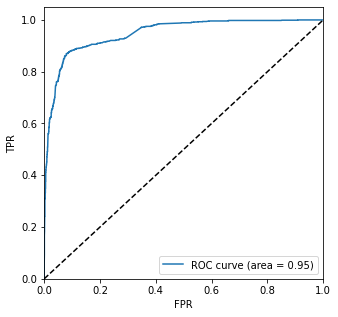

In [130]:
draw_roc(y_pred_1.actual,y_pred_1.Converted_prob)

In [131]:
model3.params.sort_values(ascending = False)

Tags_Closed by Horizzon                     8.592692
Tags_Lost to EINS                           7.847436
Origin_Lead Add Form                        3.736425
Tags_Will revert after reading the email    3.524223
Tags_Busy                                   2.931184
Last_Notable_Activity_Email Bounced         2.789834
Occupation_Working Professional             2.729028
Last_Notable_Activity_SMS Sent              2.423347
Total Time Spent on Website                 0.976612
Tags_Ringing                               -1.348759
lastactivity_Olark Chat Conversation       -1.467006
Tags_switched off                          -1.568005
lastactivity_Email Bounced                 -3.110392
const                                      -4.171104
dtype: float64

#### Observations and recommendations:

###### Train dataset model performance:
- accuracy score:-  0.88
- precision:-  0.81 
- recall:-  0.88 
- sensitivity:-  0.88 
- specificity:-  0.87 
- Positive_prediction_power:-  0.81 
- negative_prediction_power:- 0.92 
- False_positive_rate:-  0.13


###### Test dataset model performance:

 - accuracy score:-  0.88 
 - precision:-  0.81 
 - recall:-  0.89 
 - sensitivity:-  0.89 
 - specificity:-  0.87 
 - Positive_prediction_power:-  0.81 
 - negative_prediction_power:- 0.93 
 - False_positive_rate:-  0.13


- Our model gives maximum weightage to factors like Tags_Closed By Horizzon, Tags_Lost to EINS, Origin_Lead Add Form as the likelihood of such leads getting converted seems to be the highest. So focussing on such leads can help maximise leads conversion.